# Monty Hall's Problem Analysis

---

A small program to analyse Monty Hall's Problem results.

The module simulates the Monty Hall's Problem taking the decision of changing (by default) the first selected door with the remaining one. The program wants to prove that this is the right answer to the problem. Changing the door doubles the probability of winning the game!

In [1]:
# Contest simulation imports.
from random import shuffle, choice
from time import sleep

# Plotting imports.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
# Contest simulation functions.

def initialize_draw():
    """Distribute randomly the awards behind the doors."""
    awards = ["MONEY", "GOAT", "SHEEP"]
    shuffle(awards)
    return {1: awards[0], 2:awards[1], 3: awards[2]}

def select_door():
    """Choose a random door."""
    return choice([1, 2, 3])

def drop_door(player_door, doors):
    """Drop one of the remaining doors that have an animal."""
    return [i for i in doors if (i != player_door) and (doors[i] != "MONEY")][0]

def change_door(player_door, empty_door, doors, change=True):
    """Change the door (by default) with the remaining one."""
    last_door = [i for i in doors if (i != player_door) and (i != empty_door)][0]
    return last_door if change else player_door

def end_contest(final_door, doors):
    """Check the result of the contest."""
    return True if doors[final_door] == "MONEY" else False

def main(change=True):
    """The main function to run the application."""
    doors = initialize_draw()
    player_door = select_door()
    empty_door = drop_door(player_door, doors)
    final_door = change_door(player_door, empty_door, doors, change=change)
    return end_contest(final_door, doors)

def repeat_contest(N=1000, change=True):
    """Repeat the contest N times."""
    contest_results = []
    total_results = []
    for _ in range(N):
        contest_results.append(main(change=change))
        total_results.append(sum(contest_results)/len(contest_results))
    return total_results

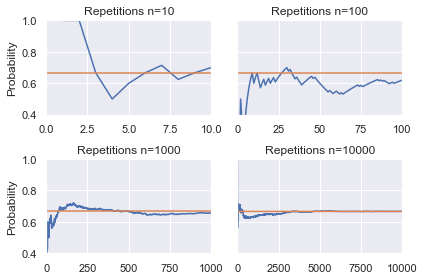

In [3]:
# Changing the door the probability of winning the contest ascends to 2/3 (0.66).

fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row')

x1 = range(1, 10+1)
y1 = repeat_contest(N=10)
z1 = [2/3] * (len(x1)+1)
axes[0, 0].plot(x1, y1, z1)
axes[0, 0].set(ylabel="Probability", xlim=(0, 10), ylim=(0.4, 1), title="Repetitions n=10")

x2 = range(1, 100+1)
y2 = repeat_contest(N=100)
z2 = [2/3] * (len(x2)+1)
axes[0, 1].plot(x2, y2, z2)
axes[0, 1].set(xlim=(0, 100), ylim=(0.4, 1), title="Repetitions n=100")

x3 = range(1, 1000+1)
y3 = repeat_contest(N=1000)
z3 = [2/3] * (len(x3)+1)
axes[1, 0].plot(x3, y3, z3)
axes[1, 0].set(ylabel="Probability", xlim=(0, 1000), ylim=(0.4, 1), title="Repetitions n=1000")

x4 = range(1, 10000+1)
y4 = repeat_contest(N=10000)
z4 = [2/3] * (len(x4)+1)
axes[1, 1].plot(x4, y4, z4)
axes[1, 1].set(xlim=(0, 10000), ylim=(0.4, 1), title="Repetitions n=10000")

fig.tight_layout()

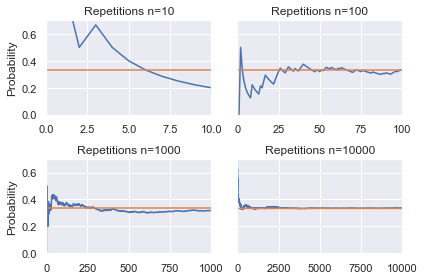

In [4]:
# Not changing the door the probability of winning the contest descends to 1/3 (0.33).

fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row')

x1 = range(1, 10+1)
y1 = repeat_contest(N=10, change=False)
z1 = [1/3] * (len(x1)+1)
axes[0, 0].plot(x1, y1, z1)
axes[0, 0].set(ylabel="Probability", xlim=(0, 10), ylim=(0, 0.7), title="Repetitions n=10")

x2 = range(1, 100+1)
y2 = repeat_contest(N=100, change=False)
z2 = [1/3] * (len(x2)+1)
axes[0, 1].plot(x2, y2, z2)
axes[0, 1].set(xlim=(0, 100), ylim=(0, 0.7), title="Repetitions n=100")

x3 = range(1, 1000+1)
y3 = repeat_contest(N=1000, change=False)
z3 = [1/3] * (len(x3)+1)
axes[1, 0].plot(x3, y3, z3)
axes[1, 0].set(ylabel="Probability", xlim=(0, 1000), ylim=(0, 0.7), title="Repetitions n=1000")

x4 = range(1, 10000+1)
y4 = repeat_contest(N=10000, change=False)
z4 = [1/3] * (len(x4)+1)
axes[1, 1].plot(x4, y4, z4)
axes[1, 1].set(xlim=(0, 10000), ylim=(0, 0.7), title="Repetitions n=10000")

fig.tight_layout()